In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Constant
DATASET1 = "DataSet_Clusters.txt"
NUM_CLUSTERS = 3
MAX_ITERATIONS = 10
INITIALIZE_CLUSTERS = ['k-means++', 'random']
CONVERGENCE_TOLERANCE = 0.001
NUM_THREADS = 8
COLORS = ['red', 'blue', 'green', 'yellow', 'gray', 'pink', 'violet', 'brown',
          'cyan', 'magenta']

In [2]:
def dataset_to_list_points(dir_dataset):
    """
    Leer fichero de texto con un conjunto de puntos y devuelve una lista de objetos Point
    """
    points = list()
    with open(dir_dataset, 'rt') as reader:
        for point in reader:
            array=point.split("::")
            f = np.array([float(array[0]),float(array[1])])
            points.append(f)
    return points

In [3]:
def print_results(centroids, num_cluster_points):
    print ('\n\nRESULTADO:')
    for i, c in enumerate(centroids):
        print ('\tCluster %d' % (i + 1))
        print ('\t\tNúmero de puntos del cluster %d' % num_cluster_points.count(i))
        print ('\t\tCentroide: %s' % str(centroids[i]))


In [4]:
def plot_results(centroids, num_cluster_points, points):
    plt.plot()
    for nc in range(len(centroids)):
        # plot points
        points_in_cluster = [boolP == nc for boolP in num_cluster_points]
        for i, p in enumerate(points_in_cluster):
            if bool(p):
                plt.plot(points[i][0], points[i][1], linestyle='None',
                         color=COLORS[nc], marker='.')
        # plot centroids
        centroid = centroids[nc]
        plt.plot(centroid[0], centroid[1], 'o', markerfacecolor=COLORS[nc],
                 markeredgecolor='k', markersize=10)
    plt.show()

In [5]:
def k_means(dataset, num_clusters, max_iterations, init_cluster, tolerance,num_threads):
    
    # Read data set
    points = dataset_to_list_points(dataset)

    # Object KMeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=max_iterations,
                    init=init_cluster, tol=tolerance, n_jobs=num_threads)

    # Calculate Kmeans
    kmeans.fit(points)

    # Obtain centroids and number Cluster of each point
    centroids = kmeans.cluster_centers_
    num_cluster_points = kmeans.labels_.tolist()

    # Print final result
    print_results(centroids, num_cluster_points)

    # Plot Final results
    plot_results(centroids, num_cluster_points, points)



RESULTADO:
	Cluster 1
		Número de puntos del cluster 575
		Centroide: [ 2.04429024  1.99783017]
	Cluster 2
		Número de puntos del cluster 233
		Centroide: [ 5.15350073  3.09247426]
	Cluster 3
		Número de puntos del cluster 191
		Centroide: [ 2.02022231  4.00032196]


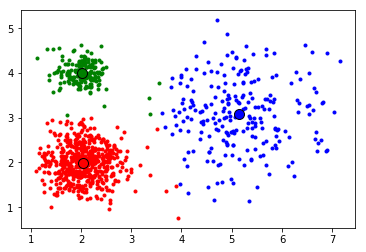

In [6]:
    #KMEANS EN DATASET1 with k-means++
    k_means(DATASET1, NUM_CLUSTERS, MAX_ITERATIONS, INITIALIZE_CLUSTERS[0],CONVERGENCE_TOLERANCE, NUM_THREADS)



RESULTADO:
	Cluster 1
		Número de puntos del cluster 191
		Centroide: [ 2.02022231  4.00032196]
	Cluster 2
		Número de puntos del cluster 575
		Centroide: [ 2.04429024  1.99783017]
	Cluster 3
		Número de puntos del cluster 233
		Centroide: [ 5.15350073  3.09247426]


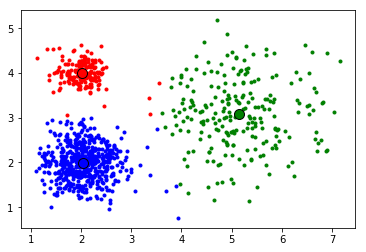

In [7]:
#KMEANS EN DATASET1 with random
k_means(DATASET1, NUM_CLUSTERS, MAX_ITERATIONS, INITIALIZE_CLUSTERS[1],CONVERGENCE_TOLERANCE, NUM_THREADS)